## Arboles de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

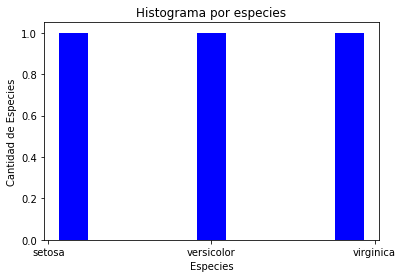

In [4]:
plt.hist(data["Species"], facecolor='b', label = 'str', bins=3, alpha=1)
plt.xlabel('Especies')
plt.ylabel('Cantidad de Especies')
plt.title('Histograma por especies')
plt.show()

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [7]:
data["is_train"] = np.random.uniform(0,1,len(data))<=0.75

In [8]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,False
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,False


Text(0.5, 1.0, 'Histograma Datos de entrenamiento')

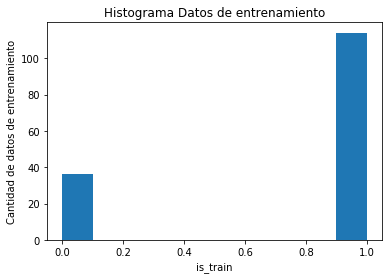

In [9]:
plt.hist(data["is_train"].apply(lambda x: int(x)))
plt.xlabel('is_train')
plt.ylabel('Cantidad de datos de entrenamiento')
plt.title('Histograma Datos de entrenamiento')

In [10]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)

In [13]:
tree.fit(train[predictors], train[target]) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [14]:
preds = tree.predict(test[predictors])

In [15]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,9,1
virginica,0,2,10


## Visualización del árbol de decisión

In [16]:
from sklearn.tree import export_graphviz

In [17]:
with open("C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/notebooks/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/l_jor/Anaconda3/Library/bin/graphviz'
from graphviz import Source

In [19]:
file = open("C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/notebooks/resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.35\\nentropy = 1.584\\nsamples = 114\\nvalue = [36, 40, 38]"] ;\n1 [label="entropy = 0.0\\nsamples = 36\\nvalue = [36, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 78\\nvalue = [0, 40, 38]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.05\\nentropy = 0.371\\nsamples = 42\\nvalue = [0, 39, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 39\\nvalue = [0, 39, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n3 -> 5 ;\n6 [label="Petal.Length <= 4.85\\nentropy = 0.183\\nsamples = 36\\nvalue = [0, 1, 35]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 33\\nvalue = [0, 0, 33]"] ;\n6 -> 8 ;\n}'

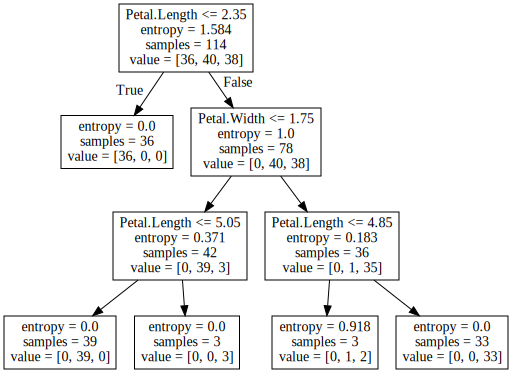

In [20]:
Source(text)

## Cross Validation para la poda

In [21]:
X = data[predictors]
Y = data[target]

In [22]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [23]:
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold

In [36]:
#cv = KFold(n=X.shape[0],n_folds=10,  shuffle=True, random_state=1)
cv = KFold(n_splits=10,  shuffle=True, random_state=1)

In [38]:
from sklearn.model_selection import cross_val_score

In [41]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)

In [42]:
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [44]:
score = np.mean(scores)
score

0.9333333333333333

In [48]:
for i in range(1, 11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10,  shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Para i = ",i," es de", score)
    print("     ", tree.feature_importances_)

Para i =  1  es de 0.5666666666666667
      [0. 0. 1. 0.]
Para i =  2  es de 0.9200000000000002
      [0.         0.         0.66620285 0.33379715]
Para i =  3  es de 0.9400000000000001
      [0.         0.         0.68976981 0.31023019]
Para i =  4  es de 0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Para i =  5  es de 0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Para i =  6  es de 0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Para i =  7  es de 0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Para i =  8  es de 0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Para i =  9  es de 0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Para i =  10  es de 0.9333333333333333
      [0.         0.         0.66869158 0.33130842]


In [49]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']